In [4]:

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Input, Convolution2D, MaxPooling2D, Concatenate

from keras.utils import np_utils
from keras.models import Model

#import matplotlib.pyplot as plt
import numpy as np

batch_size = 64
num_classes = 10
nb_epochs = 12
nb_filters = 64
my_optimizer = 'adadelta' # proved better than 'adam' in my experiments

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



# In 2D, "channels_last" assumes (rows, cols, channels) while "channels_first" assumes (channels, rows, cols). 

# there is only one channel here (levels of grey), so we need to create a dim here
# for color pictures we would have 3: RGB

# option 'channels last'
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)	

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

my_max = np.amax(x_train)

x_train /= my_max # divide by 255 (max value) to have all values between 0 and 1
x_test /= my_max

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# transforms integers labels into one-hot flags of length ncol
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

my_input = Input(shape=input_shape, dtype='float32')

conv_1 = Convolution2D(nb_filters, 3, 3, # region size is (3, 3)
                       border_mode = 'valid',
					   activation = 'relu', 
                       #input_shape=input_shape
					  ) (my_input)
# output is of dim  [(w - f + 2p) / s] + 1, where w is input size, f is filter size, s is stride, and p is amount of zero padding
# [28 - 3 + 2*0 / 1] + 1 

pooled_conv_1 = MaxPooling2D(pool_size=(2,2)) (conv_1)
pooled_conv_1_dropped = Dropout(0.2) (pooled_conv_1)

conv_11 = Convolution2D(nb_filters, 3, 3,
                       border_mode = 'valid',
					   activation = 'relu', 
                       #input_shape=input_shape
					  ) (pooled_conv_1_dropped)
pooled_conv_11 = MaxPooling2D(pool_size=(2,2)) (conv_11)
pooled_conv_11_dropped = Dropout(0.2) (pooled_conv_11)

pooled_conv_11_dropped_flat = Flatten()(pooled_conv_11_dropped)

# increasing the number of different filter sizes proved better than increasing depth of each individually in my experiments

# ====

conv_2 = Convolution2D(nb_filters, 4, 4, 
                       border_mode = 'valid',
					   activation = 'relu', 
                       #input_shape=input_shape
					  ) (my_input)
pooled_conv_2 = MaxPooling2D(pool_size=(2,2)) (conv_2)
pooled_conv_2_dropped = Dropout(0.2) (pooled_conv_2)

conv_22 = Convolution2D(nb_filters, 4, 4, 
                       border_mode = 'valid',
					   activation = 'relu', 
                       #input_shape=input_shape
					  ) (pooled_conv_2_dropped)
pooled_conv_22 = MaxPooling2D(pool_size=(2,2)) (conv_22)
pooled_conv_22_dropped = Dropout(0.2) (pooled_conv_22)

pooled_conv_22_dropped_flat = Flatten()(pooled_conv_22_dropped)

# ====

conv_3 = Convolution2D(nb_filters, 5, 5, 
                       border_mode = 'valid',
					   activation = 'relu', 
                       #input_shape=input_shape
					  ) (my_input)
pooled_conv_3 = MaxPooling2D(pool_size=(2,2)) (conv_3)
pooled_conv_3_dropped = Dropout(0.2) (pooled_conv_3)

conv_33 = Convolution2D(nb_filters, 2, 2, 
                       border_mode = 'valid',
					   activation = 'relu', 
                       #input_shape=input_shape
					  ) (pooled_conv_3_dropped)
pooled_conv_33 = MaxPooling2D(pool_size=(2,2)) (conv_33)
pooled_conv_33_dropped = Dropout(0.2) (pooled_conv_33)

pooled_conv_33_dropped_flat = Flatten()(pooled_conv_33_dropped)

# ====

# ====

conv_4 = Convolution2D(nb_filters, 6, 6, 
                       border_mode = 'valid',
					   activation = 'relu', 
                       #input_shape=input_shape
					  ) (my_input)
pooled_conv_4 = MaxPooling2D(pool_size=(2,2)) (conv_4)
pooled_conv_4_dropped = Dropout(0.2) (pooled_conv_4)

conv_44 = Convolution2D(nb_filters, 6, 6, 
                       border_mode = 'valid',
					   activation = 'relu', 
                       #input_shape=input_shape
					  ) (pooled_conv_4_dropped)
pooled_conv_44 = MaxPooling2D(pool_size=(2,2)) (conv_44)
pooled_conv_44_dropped = Dropout(0.2) (pooled_conv_44)

pooled_conv_44_dropped_flat = Flatten()(pooled_conv_44_dropped)

# ====

merge = Concatenate() ([pooled_conv_11_dropped_flat,pooled_conv_22_dropped_flat,pooled_conv_33_dropped_flat,pooled_conv_44_dropped_flat])
merge_dropped = Dropout(0.2) (merge)

dense = Dense(128,
             activation='relu'
			) (merge_dropped)
dense_dropped = Dropout(0.2) (dense)

prob = Dense(output_dim = num_classes, # we output a prob distribution over the classes
             activation='softmax'
			) (dense_dropped)

model = Model(my_input, prob)

print([layer.output_shape for layer in model.layers])

model.compile(loss='categorical_crossentropy',
			  optimizer=my_optimizer,
			  metrics=['accuracy'])

model.fit(x_train, 
		  y_train, 
		  batch_size = batch_size, 
		  nb_epoch = nb_epochs,
		  validation_data = (x_test, y_test)
		 )
		  

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:120: UserWarning: Update your `C

[(None, 28, 28, 1), (None, 26, 26, 64), (None, 25, 25, 64), (None, 24, 24, 64), (None, 23, 23, 64), (None, 13, 13, 64), (None, 12, 12, 64), (None, 12, 12, 64), (None, 11, 11, 64), (None, 13, 13, 64), (None, 12, 12, 64), (None, 12, 12, 64), (None, 11, 11, 64), (None, 11, 11, 64), (None, 9, 9, 64), (None, 11, 11, 64), (None, 6, 6, 64), (None, 5, 5, 64), (None, 4, 4, 64), (None, 5, 5, 64), (None, 3, 3, 64), (None, 5, 5, 64), (None, 4, 4, 64), (None, 5, 5, 64), (None, 3, 3, 64), (None, 1600), (None, 1024), (None, 1600), (None, 576), (None, 4800), (None, 4800), (None, 128), (None, 128), (None, 10)]


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:161: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:176: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 28s 469us/step - loss: 0.1710 - acc: 0.9457 - val_loss: 0.0370 - val_acc: 0.9881
Epoch 2/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0538 - acc: 0.9838 - val_loss: 0.0357 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.0395 - acc: 0.9880 - val_loss: 0.0258 - val_acc: 0.9914
Epoch 4/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.0333 - acc: 0.9894 - val_loss: 0.0210 - val_acc: 0.9929
Epoch 5/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0291 - acc: 0.9908 - val_loss: 0.0225 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.0245 - acc: 0.9927 - val_loss: 0.0220 - val_acc: 0.9938
Epoch 7/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0208 - acc: 0.9935 - val_

In [1]:
import numpy as np
from sklearn.datasets import load_digits

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
X, y = load_digits(return_X_y=True)

In [0]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

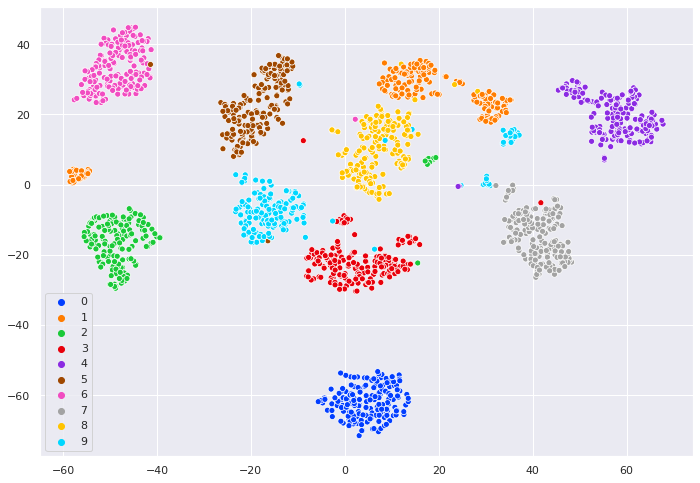

In [17]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)